# Presentation

## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.basemap import Basemap
from matplotlib import animation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
from altair import *
%matplotlib inline

In [2]:
from ipywidgets import interact, fixed
from IPython.display import display

In [3]:
data = pd.read_csv('/data/glirios/Pokemon.csv', index_col=0)

In [4]:
data.head()

,pokemonId,latitude,longitude,appearedTimeOfDay,appearedDayOfWeek,appearedLocalTime,appearedHour,appearedDay,city,temperature,continent,population_density,class
0,16,20.525745,-97.460829,night,Monday,2016-09-08T03:57:45,5,8,Mexico_City,25.5,America,2431.2341,16
1,133,20.523695,-97.461167,night,Monday,2016-09-08T03:57:37,5,8,Mexico_City,25.5,America,2431.2341,133
2,16,38.903590,-77.199780,night,Monday,2016-09-08T03:57:25,5,8,New_York,24.2,America,761.8856,16
3,13,47.665903,-122.312561,night,Monday,2016-09-08T03:56:22,5,8,Los_Angeles,15.6,America,4842.1626,13
4,133,47.666454,-122.311628,night,Monday,2016-09-08T03:56:08,5,8,Los_Angeles,15.6,America,4842.1626,133


In [5]:
data.shape

(296021, 13)

In [6]:
locs = pd.read_csv('/data/glirios/poke_locs.csv', index_col = 0)

In [7]:
locs.head()

,city,latitude,longitude,appearedLocalTime
0,Mexico_City,20.525745,-97.460829,2016-09-08T03:57:45
1,Mexico_City,20.523695,-97.461167,2016-09-08T03:57:37
2,New_York,38.903590,-77.199780,2016-09-08T03:57:25
3,Los_Angeles,47.665903,-122.312561,2016-09-08T03:56:22
4,Los_Angeles,47.666454,-122.311628,2016-09-08T03:56:08


## Basemap Plotting

/opt/conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3245: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  ax.hold(b)


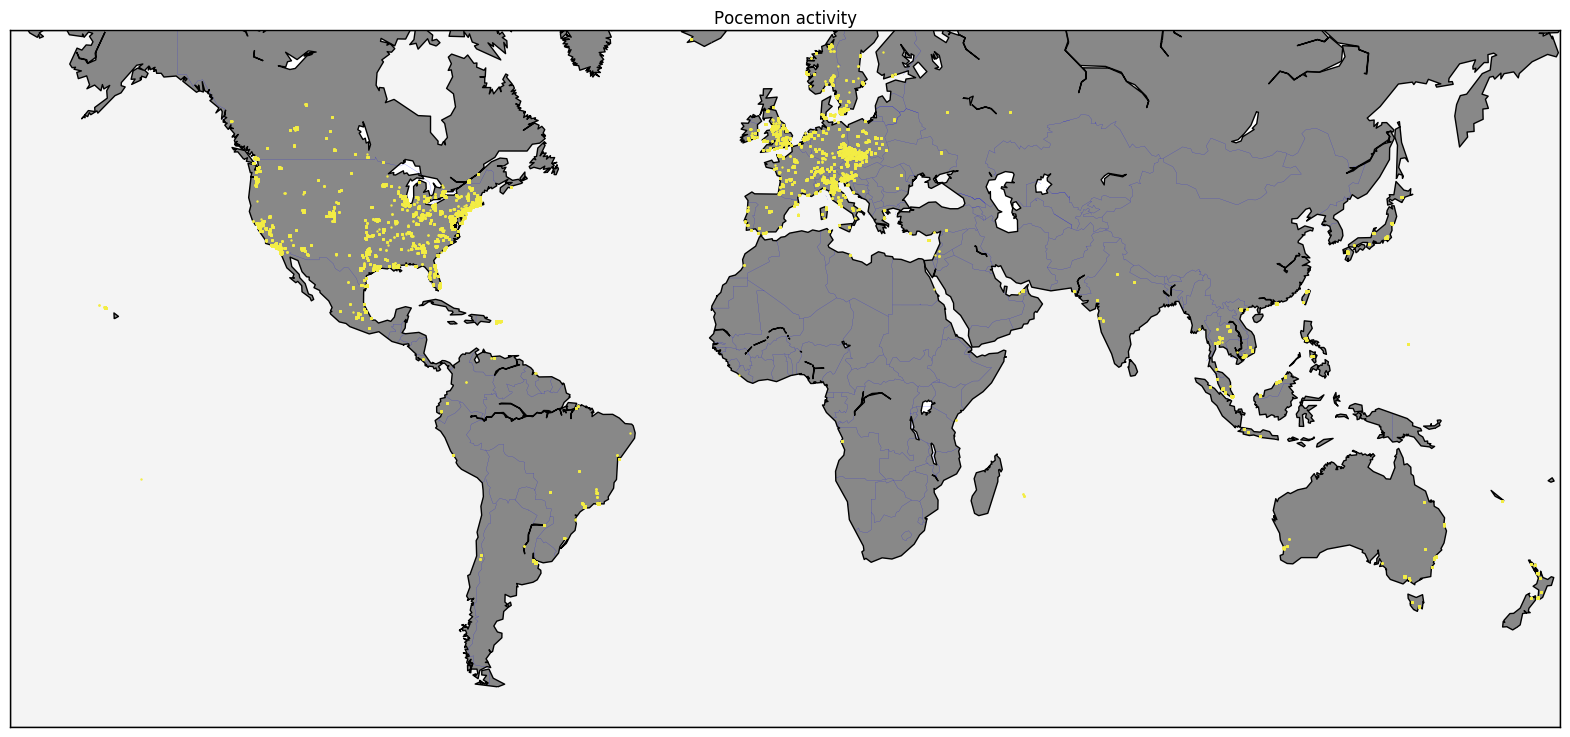

In [8]:
plt.figure(1, figsize=(20,10))
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#888888',lake_color='#FFFFFF') # light grey land, white lakes
m1.drawmapboundary(fill_color='#f4f4f4')                # dark outlines
m1.drawcountries(linewidth=0.1, color="b")              # thin black line for country borders
m1.drawcoastlines()

# Plot the data
x, y = m1(locs.longitude.tolist(),locs.latitude.tolist())
m1.scatter(x,y, s=3, c="#F3ED44", lw=0, alpha=1, zorder=5)
plt.title("Pocemon activity")
plt.show()

In [9]:
def pokemon_hour(hour):
    # extract feature local time
    data['LocalTime'] = data.appearedLocalTime.apply(lambda x: x.split("T")[1])

    # grouping data by time (hour)
    loc_time = data.groupby(['city', data.LocalTime.map(lambda x: int(x.split(":")[0]))]).size()
    loc_time = loc_time.unstack()
    loc_time = loc_time.fillna(0)

    # plot grouping data
    f, axes = plt.subplots(1, 1, figsize=(25, 10))
    sns.barplot(x=loc_time.index, y=loc_time[hour], ax=axes)
    axes.set(ylabel="Count", title="Pokemon in City activity at %2d:00 Local time" %(hour))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

<function __main__.pokemon_hour>

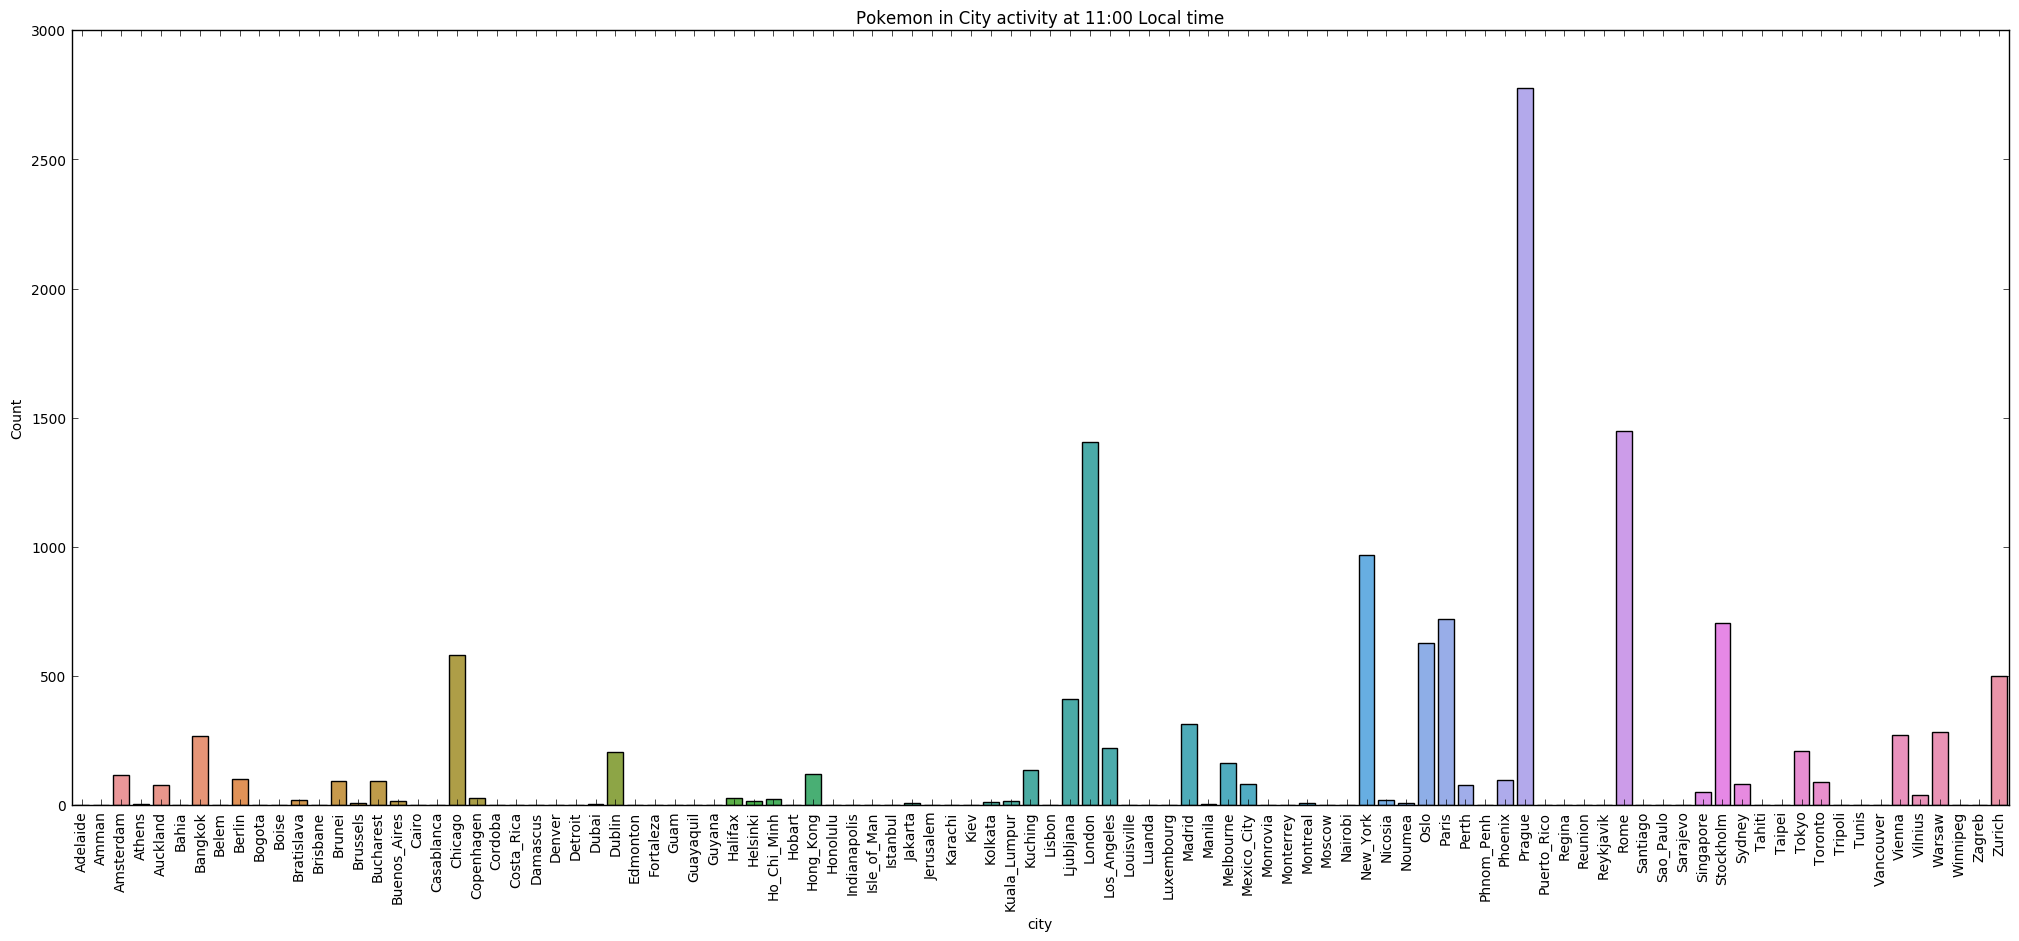

In [10]:
interact(pokemon_hour, hour=(0,23,1))

## Modeling



In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
acc_9 = round(accuracy_score(Y_test, Y_pred)*100, 2)

In [12]:
models = pd.read_csv('/data/glirios/poke_models.csv', index_col = 0)

In [13]:
models.sort_values(by='Accuracy Score', ascending=False)

,Accuracy Score,Model
5,100.00,Decision Tree
2,99.74,Gaussian
1,81.93,KNeighbors
3,18.38,Perceptron
0,14.33,BernoulliNB
4,13.30,Stochastic Gradient Decent


197 Columns 